In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
#from fancyimpute import IterativeImputer
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [28]:
data=pd.read_csv('aug.csv',index_col=False)
print(data.shape)
data.head()

(19158, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [29]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

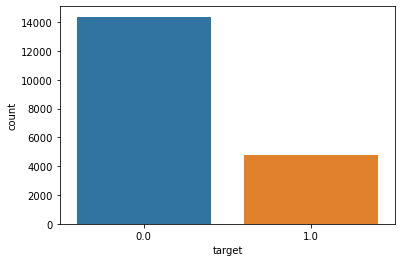

In [30]:
sns.countplot(x='target',data=data)

In [31]:
print('People looking for job:',(len(data[data['target']==1])/len(data['target']))*100)
print('People not looking for job:',(len(data[data['target']==0])/len(data['target']))*100)

People looking for job: 24.934753105752165
People not looking for job: 75.06524689424784


Above figures show that data is imbalanced

<AxesSubplot:xlabel='gender', ylabel='major_discipline'>

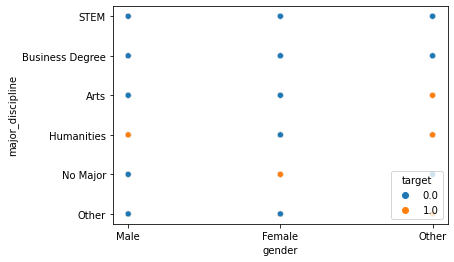

In [32]:
sns.scatterplot(x='gender',y='major_discipline',hue='target',data=data)

Male population in the disciplene of 'Humanities',female population with no major and other population with arts and humanities major are looking for a job change

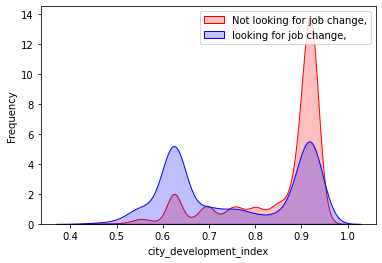

In [33]:
g = sns.kdeplot(data['city_development_index'][(data["target"] == 0) & (data['city_development_index'].notnull())], color="Red", shade = True)
g = sns.kdeplot(data['city_development_index'][(data["target"] == 1) & (data['city_development_index'].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel('city_development_index')
g.set_ylabel("Frequency")
g = g.legend(["Not looking for job change,","looking for job change,"])


people looking for job change are majorly populated in the cities with city development index around 0.62 and 0.92

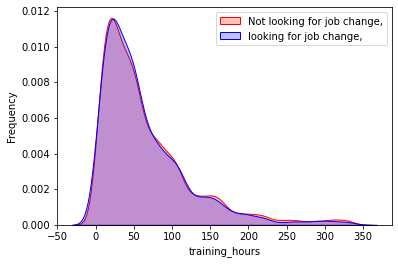

In [34]:
g = sns.kdeplot(data['training_hours'][(data["target"] == 0) & (data['training_hours'].notnull())], color="Red", shade = True)
g = sns.kdeplot(data['training_hours'][(data["target"] == 1) & (data['training_hours'].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel('training_hours')
g.set_ylabel("Frequency")
g = g.legend(["Not looking for job change,","looking for job change,"])


It shows that entire population goes through training irrespective of job search

<AxesSubplot:xlabel='education_level', ylabel='count'>

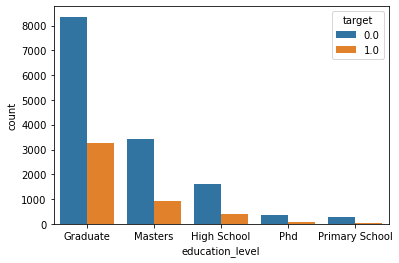

In [35]:
sns.countplot(x='education_level',data=data,hue='target')

close to half of the graduates, and 1/3 rd of the people with masters degree are looking for job change;however we also need to consider that data is imbalanced in nature 

<AxesSubplot:>

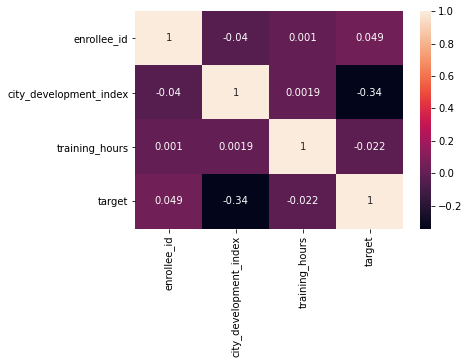

In [36]:
sns.heatmap(data.corr(), annot=True)

#Encoding

In [37]:
#labeling data_test
#print(data['gender'].unique())
#data['gender']=le.fit_transform(data['gender'])
data.loc[data['gender']=='Male','gender']=1
data.loc[data['gender']=='Female','gender']=0
data.loc[data['gender']=='Other','gender']=2
#print(data['gender'].unique())
data.loc[data['gender']=='Male','gender']=1
data.loc[data['gender']=='Female','gender']=0
data.loc[data['gender']=='Other','gender']=2

col=['city','relevent_experience']
for x in col:
    #print(data[x].unique())
    le=preprocessing.LabelEncoder()
    data[x]=le.fit_transform(data[x])
    #print(data[x].unique())



In [38]:
#print(data['enrolled_university'].unique())
#data['gender']=le.fit_transform(data['gender'])
data.loc[data['enrolled_university']=='no_enrollment','enrolled_university']=0
data.loc[data['enrolled_university']=='Full time course','enrolled_university']=2
data.loc[data['enrolled_university']=='Part time course','enrolled_university']=1
#print(data['gender'].unique())

In [39]:
#print(data['education_level'].unique())
data.loc[data['education_level']=='Primary School','education_level']=0
data.loc[data['education_level']=='High School','education_level']=1
data.loc[data['education_level']=='Graduate','education_level']=2
data.loc[data['education_level']=='Masters','education_level']=3
data.loc[data['education_level']=='Phd','education_level']=4
#print(data['education_level'].unique())

In [40]:
#print(data['major_discipline'].unique())
data.loc[data['major_discipline']=='STEM','major_discipline']=0
data.loc[data['major_discipline']=='Business Degree','major_discipline']=1
data.loc[data['major_discipline']=='Arts','major_discipline']=2
data.loc[data['major_discipline']=='Humanities','major_discipline']=3
data.loc[data['major_discipline']=='No Major','major_discipline']=4
data.loc[data['major_discipline']=='Other','major_discipline']=5

In [41]:
#print(data['company_type'].unique())
data.loc[data['company_type']=='Pvt Ltd','company_type']=0
data.loc[data['company_type']=='Funded Startup','company_type']=1
data.loc[data['company_type']=='Early Stage Startup','company_type']=2
data.loc[data['company_type']=='Other','company_type']=3
data.loc[data['company_type']=='Public Sector','company_type']=4
data.loc[data['company_type']=='NGO','company_type']=5
#print(data['company_type'].unique())

In [42]:
data.loc[data["experience"] == ">20", "experience"] = 2
data.loc[data["experience"] == "<1", "experience"] = 0


In [43]:
data.loc[data["last_new_job"].isin (["1", "2", "3", "4"]), "last_new_job"] = 0
data.loc[data["last_new_job"] == ">4", "last_new_job"] = 1
data.loc[data["last_new_job"] == "never", "last_new_job"] = 2
data["last_new_job"].unique()

array([0, 1, 2, nan], dtype=object)

In [44]:
data['company_size'].unique()
data.loc[data['company_size'] == '50-99','company_size'] = 0
data.loc[data['company_size'] == '<10', 'company_size'] = 1
data.loc[data['company_size'] == '10000+', 'company_size'] =2
data.loc[data['company_size'] == '5000-9999', 'company_size'] = 3
data.loc[data['company_size'] == '1000-4999', 'company_size'] = 4
data.loc[data['company_size'] == '10/49', 'company_size'] = 5
data.loc[data['company_size'] == '100-500', 'company_size'] = 6
data.loc[data['company_size'] == '500-999', 'company_size'] = 7
#data['company_size'] = data['company_size'].apply (lambda series: pd.Series (le.fit_transform (series[series.notnull ()]),index=series[series.notnull ()].index))

In [45]:
data.head() #labelled dataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,1,0,0,2,0,2,NaN,NaN,0,36,1.0
1,29725,77,0.776,1,1,0,2,0,15,0,0,1,47,0.0
2,11561,64,0.624,NaN,1,2,2,0,5,NaN,NaN,2,83,0.0
3,33241,14,0.789,NaN,1,NaN,2,1,0,NaN,0,2,52,1.0
4,666,50,0.767,1,0,0,3,0,2,0,1,0,8,0.0


# Handling null values

In [46]:
lr = LinearRegression()
mice_imputer = IterativeImputer(random_state=42, estimator=lr, max_iter=10, n_nearest_features=2, imputation_order = 'roman')
data_imputed = mice_imputer.fit_transform(data)
data_impute=pd.DataFrame(data_imputed)
data_impute.columns = ['enrollee_id','city','city_development_index','gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline',
                                                         'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']
                                                        
data_impute.head()
#enrollee_id	city	city_development_index	gender	relevent_experience	enrolled_university	education_level	major_discipline	experience	company_size	company_type	last_new_job	training_hours	target

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949.0,5.0,0.920,1.000000,0.0,0.000000,2.0,0.0,2.0,3.121086,0.538857,0.0,36.0,1.0
1,29725.0,77.0,0.776,1.000000,1.0,0.000000,2.0,0.0,15.0,0.000000,0.000000,1.0,47.0,0.0
2,11561.0,64.0,0.624,0.950090,1.0,2.000000,2.0,0.0,5.0,3.122702,1.434604,2.0,83.0,0.0
3,33241.0,14.0,0.789,0.944701,1.0,0.862274,2.0,1.0,0.0,3.058789,0.000000,2.0,52.0,1.0
4,666.0,50.0,0.767,1.000000,0.0,0.000000,3.0,0.0,2.0,0.000000,1.000000,0.0,8.0,0.0


In [47]:
data_impute.isnull().any()
data['target'].astype(int)

0        1
1        0
2        0
3        1
4        0
        ..
19153    1
19154    1
19155    0
19156    0
19157    0
Name: target, Length: 19158, dtype: int32

In [48]:
x=data_impute.drop('target',axis=1)
y=data_impute['target']

Splitting the data into train and test

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

Model Building:
1.Logistic regression
2.K-nearest neighbours
3.Naive Bias
4.SVM
5.LGBM classifier

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logr=LogisticRegression()
logr.fit(x_train,y_train)
pred=logr.predict(x_test)
print('Training Accuracy:',logr.score(x_train,y_train)*100)
print('Testing Accuracy:',logr.score(x_test,y_test)*100)
print(classification_report(y_test, pred))

Training Accuracy: 75.17524235645041
Testing Accuracy: 74.80862908837857
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      4300
         1.0       0.00      0.00      0.00      1448

    accuracy                           0.75      5748
   macro avg       0.37      0.50      0.43      5748
weighted avg       0.56      0.75      0.64      5748



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('Training Accuracy KNN:',knn.score(x_train,y_train)*100)
print('Testing Accuracy KNN:',knn.score(x_train,y_train)*100)
print(classification_report(y_test, pred))

Training Accuracy KNN: 82.73676360924684
Testing Accuracy KNN: 82.73676360924684
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80      4300
         1.0       0.30      0.21      0.25      1448

    accuracy                           0.68      5748
   macro avg       0.53      0.52      0.52      5748
weighted avg       0.64      0.68      0.66      5748



In [52]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Training Accuracy NB:',gnb.score(x_train,y_train)*100)
print('Testing Accuracy NB:',gnb.score(x_train,y_train)*100)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

Training Accuracy NB: 74.19835943325876
Testing Accuracy NB: 74.19835943325876
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80      4300
         1.0       0.30      0.21      0.25      1448

    accuracy                           0.68      5748
   macro avg       0.53      0.52      0.52      5748
weighted avg       0.64      0.68      0.66      5748



In [53]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
print('Training Accuracy SVM:',svm.score(x_train,y_train)*100)
print('Testing Accuracy SVM:',svm.score(x_train,y_train)*100)

Training Accuracy SVM: 75.17524235645041
Testing Accuracy SVM: 75.17524235645041


In [54]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier (random_state=17)
#lgbm_model = lgbm.fit (X_train, y_train)
lgbm.fit(x_train,y_train)
pred_lgbm=lgbm.predict(x_test)
print('Training Accuracy LGBM:',lgbm.score(x_train,y_train)*100)
print('Testing Accuracy LGBM:',lgbm.score(x_train,y_train)*100)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lgbm))

Training Accuracy LGBM: 86.04026845637584
Testing Accuracy LGBM: 86.04026845637584
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      4300
         1.0       0.59      0.55      0.57      1448

    accuracy                           0.79      5748
   macro avg       0.72      0.71      0.71      5748
weighted avg       0.78      0.79      0.79      5748



It shows that LGBM classifier shows better accuracy score among all followed by KNN

Lets perform smote to handle data imbalance 

In [55]:
#!pip install imblearn
from imblearn.over_sampling import SVMSMOTE
svm_smote = SVMSMOTE(sampling_strategy='minority', random_state=42, k_neighbors=3)
x_smote, y_smote = svm_smote.fit_resample(x,y)
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote,y_smote, test_size=0.25, random_state=42)

Training Accuracy LGBM: 89.04084187103055
Testing Accuracy LGBM: 89.04084187103055
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      3603
         1.0       0.87      0.86      0.86      3588

    accuracy                           0.86      7191
   macro avg       0.86      0.86      0.86      7191
weighted avg       0.86      0.86      0.86      7191

auc score : 0.8621740337158648


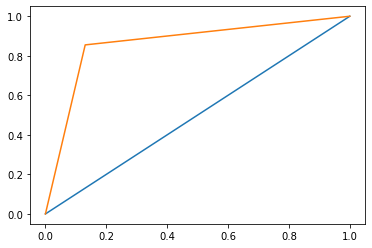

In [56]:
lgbm.fit(x_train_smote,y_train_smote)
pred_lgbm_smote=lgbm.predict(x_test_smote)
print('Training Accuracy LGBM:',lgbm.score(x_train_smote,y_train_smote)*100)
print('Testing Accuracy LGBM:',lgbm.score(x_train_smote,y_train_smote)*100)
from sklearn.metrics import classification_report
print(classification_report(y_test_smote, pred_lgbm_smote))
from sklearn.metrics import roc_curve,roc_auc_score,auc
a,b,c=roc_curve(y_test_smote, pred_lgbm_smote)
plt.plot([0,1])
plt.plot(a,b)
print("auc score :",auc(a,b))

Training Accuracy knn: 87.16795697927773
Testing Accuracy knn: 87.16795697927773
              precision    recall  f1-score   support

         0.0       0.80      0.68      0.73      3603
         1.0       0.72      0.83      0.77      3588

    accuracy                           0.75      7191
   macro avg       0.76      0.75      0.75      7191
weighted avg       0.76      0.75      0.75      7191

auc score : 0.7526262488431695


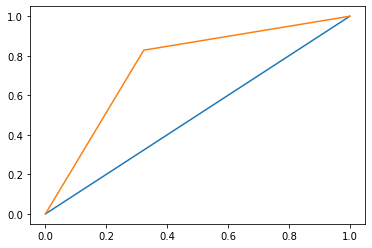

In [57]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_smote,y_train_smote)
pred_knn_smote=knn.predict(x_test_smote)
print('Training Accuracy knn:',knn.score(x_train_smote,y_train_smote)*100)
print('Testing Accuracy knn:',knn.score(x_train_smote,y_train_smote)*100)
from sklearn.metrics import classification_report
print(classification_report(y_test_smote, pred_knn_smote))
from sklearn.metrics import roc_curve,roc_auc_score,auc
a,b,c=roc_curve(y_test_smote, pred_knn_smote)
plt.plot([0,1])
plt.plot(a,b)
print("auc score :",auc(a,b))

It shows that LGBM classifier is the best fit with accuracy score 89% and moderate precision and recall with implementation of smote